# 5-8. 프로젝트: 나랑 닮은 연예인을 찾아보자

## 라이브러리 불러오기
---

In [2]:
import os
import face_recognition

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img

import numpy as np

from PIL import Image

## Step1. 사진 모으기
---

file_list: ['신봉선.jpg', '홍대광3.jpg', '이충열2.jpg', '현빈.jpg', '고윤정.png', '박휘순1.jpg', '옥동자.jpg', '원빈3.jpg', '저스틴비버.jpg', '수지.jpg', '박휘순3.jpg', '장동건.jpg', '이연희.jpg', '톰크루즈1.jpg', '성시경1.jpg', '성시경2.jpg', '류준열.jpg', '이충열1.jpg', '원빈2.jpg', '홍대광2.jpg', '한무.jpg', '유해진.jpg', '홍대광1.jpg', '원빈1.jpg', '박민영.jpg', '심양홍.jpg', '잭블랙.jpg', '박휘순2.jpg', '톰크루즈2.jpg', '싸이.jpg']


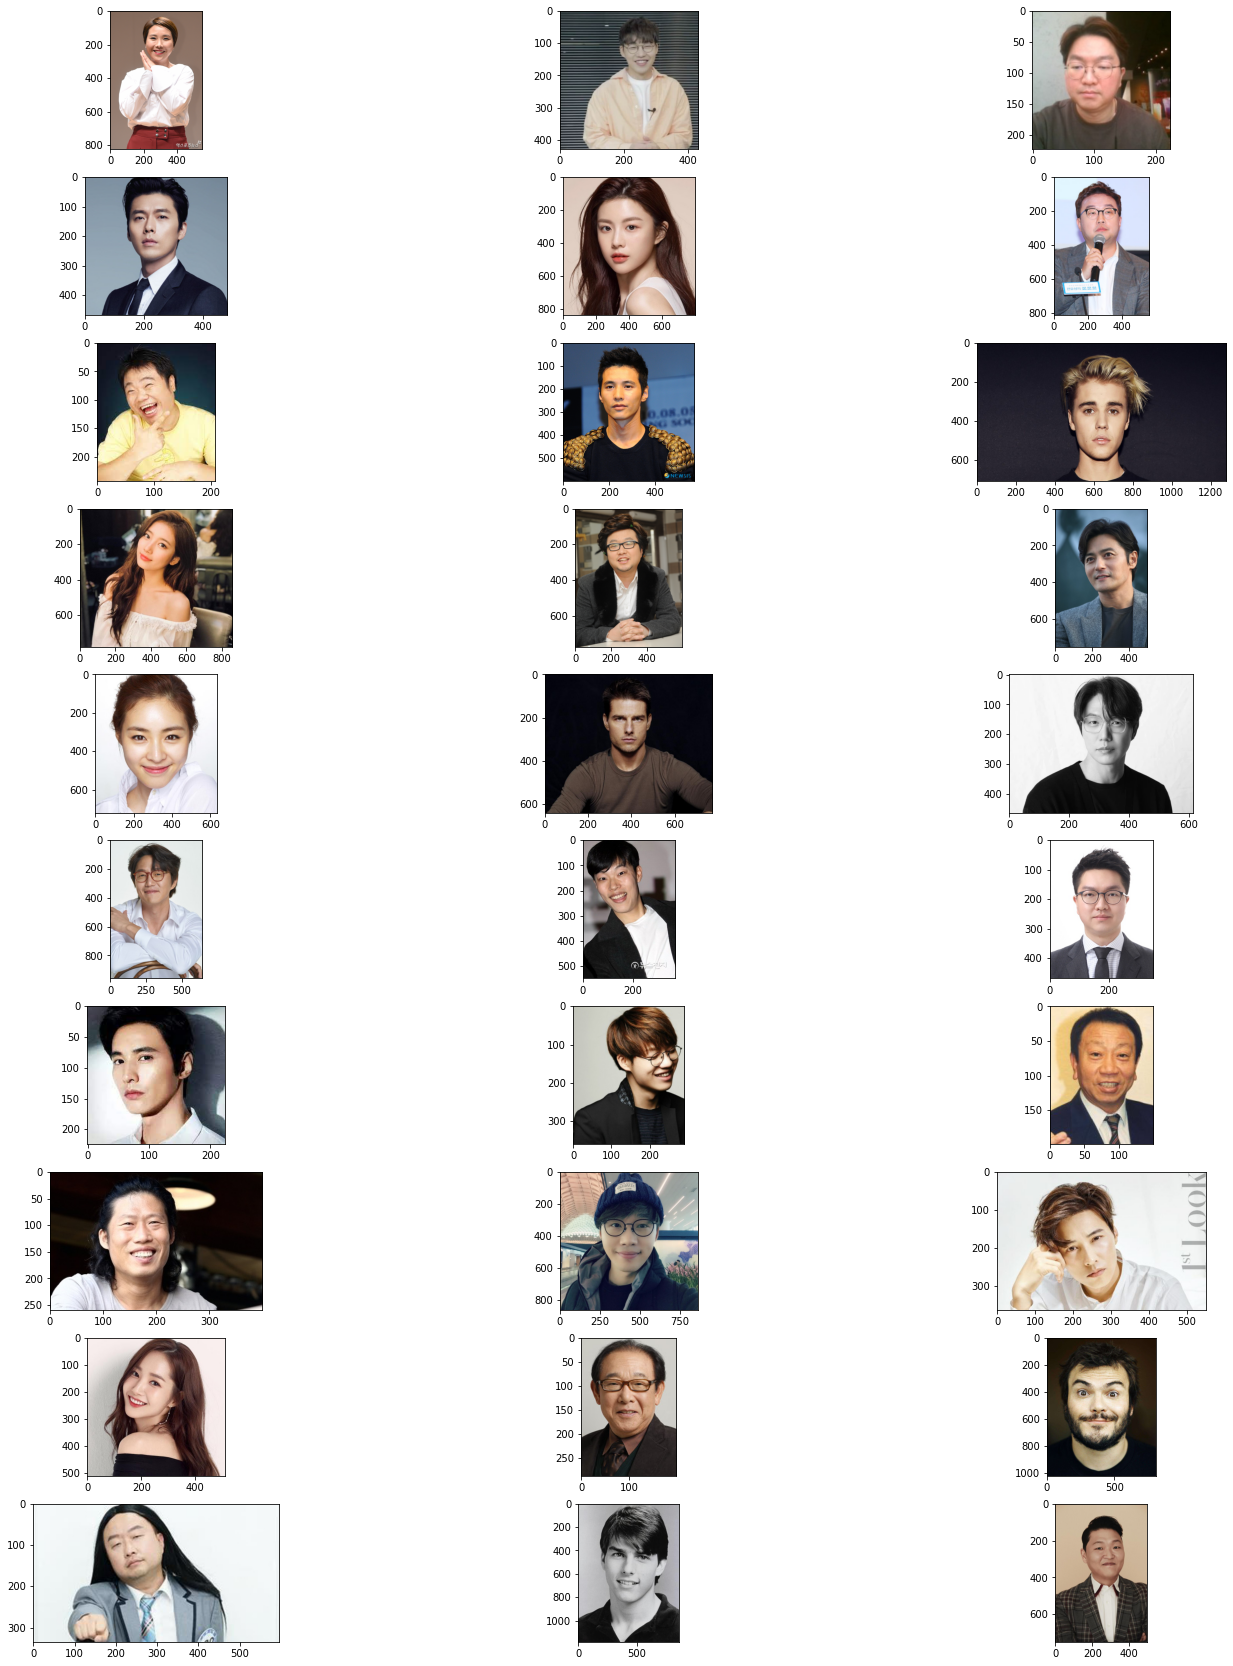

In [47]:
# 파일 경로 설정
dir_path = os.getenv('HOME') + '/aiffel/face_embedding/imagesforEP'
file_list = os.listdir(dir_path)

print('file_list: {}'.format(file_list))

# Set figsize
fig, axes = plt.subplots(nrows = 10, ncols = 3, figsize = (24, 30))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path + '/' + file_list[i])
    ax.imshow(image)
    
plt.show()

fig.tight_layout()

## Step2. 얼굴 영역 자르기
---

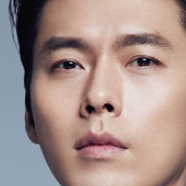

In [48]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face


image_path = dir_path + '/' + file_list[3]
# image_path = os.getenv('HOME')+'/aiffel/face_embedding/imagesforEP/현빈.jpg'
face = get_cropped_face(image_path)
pillow_image = Image.fromarray(face)
#pillow_image.save(path_to_save)
pillow_image

## Step3. 얼굴 영역의 임베딩 추출하기
---
`def get_face_embedding(face)` : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수   
`def get_face_embedding_dict(dir_path)` : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [18]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding

[array([-0.07387917,  0.14364266,  0.04078433, -0.10779011, -0.1111301 ,
        -0.02421434, -0.06495111, -0.12588182,  0.15632014, -0.10807928,
         0.27832332, -0.08559756, -0.22715326, -0.05768999, -0.04620539,
         0.18484031, -0.24866059, -0.11075418, -0.02892634, -0.00843562,
         0.11311822,  0.08365717, -0.0191356 ,  0.01135655, -0.11401916,
        -0.40693069, -0.06151159, -0.07952178, -0.02856171, -0.0762374 ,
        -0.04155636,  0.04024892, -0.19656447, -0.03272824, -0.00534972,
         0.03778354, -0.08716264, -0.09846441,  0.1587873 ,  0.03995203,
        -0.22564329,  0.04469812,  0.05887164,  0.19011486,  0.13621412,
         0.03288202,  0.02667574, -0.17526759,  0.09750584, -0.19483282,
        -0.0366632 ,  0.14688665,  0.00486302,  0.07307445,  0.00564658,
        -0.10832753, -0.02437333,  0.08099331, -0.18233076, -0.02541016,
         0.10898522, -0.11596235, -0.05222968, -0.1518704 ,  0.23105824,
         0.10580226, -0.0999518 , -0.15103053,  0.0

In [19]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    
    return embedding_dict

In [20]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['신봉선']

array([-0.07387917,  0.14364266,  0.04078433, -0.10779011, -0.1111301 ,
       -0.02421434, -0.06495111, -0.12588182,  0.15632014, -0.10807928,
        0.27832332, -0.08559756, -0.22715326, -0.05768999, -0.04620539,
        0.18484031, -0.24866059, -0.11075418, -0.02892634, -0.00843562,
        0.11311822,  0.08365717, -0.0191356 ,  0.01135655, -0.11401916,
       -0.40693069, -0.06151159, -0.07952178, -0.02856171, -0.0762374 ,
       -0.04155636,  0.04024892, -0.19656447, -0.03272824, -0.00534972,
        0.03778354, -0.08716264, -0.09846441,  0.1587873 ,  0.03995203,
       -0.22564329,  0.04469812,  0.05887164,  0.19011486,  0.13621412,
        0.03288202,  0.02667574, -0.17526759,  0.09750584, -0.19483282,
       -0.0366632 ,  0.14688665,  0.00486302,  0.07307445,  0.00564658,
       -0.10832753, -0.02437333,  0.08099331, -0.18233076, -0.02541016,
        0.10898522, -0.11596235, -0.05222968, -0.1518704 ,  0.23105824,
        0.10580226, -0.0999518 , -0.15103053,  0.0949161 , -0.12

## Step4. 모은 연예인들과 비교하기
---
#### 저의 사진들끼리의 얼굴 임베딩 벡터 거리를 구하였습니다. 두 사진 간의 임베딩 벡터의 거리가 약 `0.39` 정도 입니다.

In [21]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('이충열1', '이충열2')

0.38563283033135215

#### 연예인 사진들과 저의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인을 찾아보겠습니다.

In [31]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [40]:
def get_nearest_face(name, top = 5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key = lambda x : sort_key_func(x[0]))
    
    for i in range(top + 4):
        if i == 0 :
            continue
        if sorted_faces[i]:
            print('순위 ({}), 이름 ({}), 거리 ({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

#### 저를 제외하고 많은 연예인들 가운데 개그맨 박휘순씨와 가장 닮은 것으로 나왔습니다. 

In [41]:
get_nearest_face('이충열1')

순위 (1), 이름 (이충열2), 거리 (0.38563283033135215)
순위 (2), 이름 (박휘순3), 거리 (0.4408933527050771)
순위 (3), 이름 (박휘순1), 거리 (0.450101739924211)
순위 (4), 이름 (성시경2), 거리 (0.4890039432562462)
순위 (5), 이름 (싸이), 거리 (0.4925944364647796)
순위 (6), 이름 (성시경1), 거리 (0.49299206871901236)
순위 (7), 이름 (현빈), 거리 (0.5184528673889774)
순위 (8), 이름 (박휘순2), 거리 (0.5239432005258776)
